# The Laplace Problem

In [1]:
%reset -f

In [2]:
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = "false"

import numpy as np
import jax
import jax.numpy as jnp
jax.config.update('jax_platform_name', 'cpu')           ## CPU is faster here !

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='ticks',
        font='sans-serif', font_scale=1, color_codes=True, rc={"lines.linewidth": 2})

from updec.cloud import GmshCloud
from updec.operators import *
from updec.utils import print_line_by_line, polyharmonic, multiquadric

## Using Updec

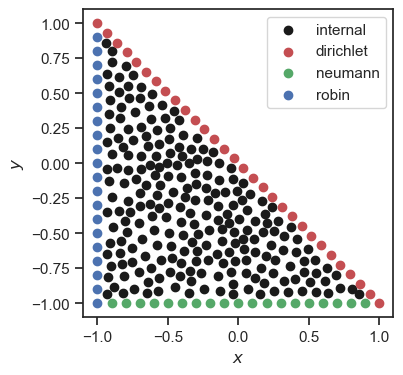

In [3]:
facet_types = {"Dirichlet":"d", "Robin":"r", "Neumann":"n"}

cloud = GmshCloud("./meshes/triangle.msh", facet_types)
cloud.visualize_cloud(figsize=(4,4));

In [4]:
cloud.facet_nodes

{'Dirichlet': [227,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  245,
  246,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  254,
  225,
  226],
 'Neumann': [255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  268,
  269,
  270,
  271,
  272,
  273],
 'Robin': [275,
  276,
  277,
  278,
  279,
  280,
  281,
  282,
  283,
  284,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  292,
  293,
  274]}

In [5]:
cloud.outward_normals

{227: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 228: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 229: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 230: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 231: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 232: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 233: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 234: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 235: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 236: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 237: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 238: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 239: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 240: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 241: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 242: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 243: DeviceArray([0.7071068, 0.7071068], dtype=float32),
 244: DeviceAr

In [6]:
# RBF = polyharmonic      ## Can define which rbf to use
# MAX_DEGREE = 4

# facet_types={0:"d", 1:"d", 2:"d", 3:"d"}
# cloud = SquareCloud(Nx=25, Ny=11, facet_types=facet_types, noise_seed=35, support_size=1*11-1)
# cloud.visualize_cloud(figsize=(4,4));